## Wojciech Poniewierka 402224 EAIiIB AiR AGH
# Laboratory 6
<br><br><br>

In [2]:
from cmdstanpy import CmdStanModel


import arviz as az
import numpy as np
import scipy.stats as stats

import matplotlib.pyplot as plt
import pandas as pd

import seaborn as sns

N = (len("Wojciech") + len("Poniewierka")) * 100

/usr/local/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
model_1 = CmdStanModel(stan_file='code_1.stan')

R = 1000
data_sim = {'N': N}
sim=model_1.sample(data=data_sim,
                     iter_sampling=R,
                     iter_warmup=0,
                     chains=1,
                     fixed_param=True,
                     seed=21,refresh=R)

df1 = sim.draws_pd()
df1.head(10)

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing
chain 1 |██████████| 00:03 Sampling completed                      


INFO:cmdstanpy:CmdStan done processing.


,lp__,accept_stat__,theta,y[1],y[2],y[3],y[4],y[5],y[6],y[7],...,y[1891],y[1892],y[1893],y[1894],y[1895],y[1896],y[1897],y[1898],y[1899],y[1900]
0,0.0,0.0,0.01,0.236407,-0.685100,0.058589,-0.040174,-0.551838,-0.293629,-1.027510,...,-0.419662,-1.311450,-1.184150,1.855430,1.579860,-0.041550,0.039470,0.876330,1.097140,-0.133813
1,0.0,0.0,0.01,1.661130,0.350429,1.711960,0.982752,-1.008850,0.110328,-1.556410,...,-1.034770,1.934550,-0.569734,0.368490,0.501694,-0.856562,0.426162,1.490070,1.828540,0.193385
2,0.0,0.0,0.01,-0.274818,-0.567366,0.949155,0.268373,0.198529,0.946267,0.552617,...,-1.528630,-0.109120,0.460395,-0.703189,1.111000,1.326050,-0.574032,-0.529232,0.758265,0.482153
3,0.0,0.0,0.01,0.065666,-0.496954,-0.117492,-2.057680,1.702710,0.755177,2.450840,...,-0.178411,-0.993100,0.494529,0.587269,0.016071,2.280470,0.723294,-0.119136,0.941828,1.355410
4,0.0,0.0,0.01,-0.557589,0.201339,0.297335,0.967091,-0.333857,-0.146839,-0.359585,...,0.454169,0.404429,-0.474937,0.335155,-0.968595,1.435010,-0.119495,1.425290,0.800427,2.606920
5,0.0,0.0,0.01,-0.854912,0.001968,0.138045,-0.685506,0.278679,12.918900,1.946050,...,-2.065510,-2.387830,0.753082,1.609690,-0.596872,-1.446650,-1.143550,0.363702,0.052278,-2.137130
6,0.0,0.0,0.01,0.719111,1.382300,-1.302870,1.361880,-1.248590,1.547620,-1.479840,...,0.610293,-2.192780,-0.640406,1.121500,-0.747296,-0.292098,-0.360925,0.439406,-0.852094,-1.093820
7,0.0,0.0,0.01,-1.266160,-0.748628,1.546060,-0.842897,0.023575,-0.577198,-0.094616,...,0.363756,1.662980,-1.090900,-1.221880,-1.596140,-0.378841,-0.446768,-0.435203,0.249697,0.861517
8,0.0,0.0,0.01,-0.804847,-0.769734,-0.879217,-1.247980,-0.154113,-0.952200,1.698250,...,-1.671780,-0.893797,-0.633148,2.202350,-0.911862,-0.903595,0.586086,-0.376823,-0.506826,-1.671640
9,0.0,0.0,0.01,1.228680,0.766979,0.085100,-0.144849,0.159686,1.066470,9.188430,...,0.219017,-1.297300,-0.739074,-1.336310,0.612426,-1.202190,-0.561754,-1.255520,-0.984964,-0.309439


In [4]:
model_2 = CmdStanModel(stan_file='code_2.stan')

R = 1000
data_sim = {'N': N}
sim=model_2.sample(data=data_sim,
                     iter_sampling=R,
                     iter_warmup=0,
                     chains=1,
                     fixed_param=True,
                     seed=21,refresh=R)

df2 = sim.draws_pd()
df2.head(10)

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing
chain 1 |██████████| 00:08 Sampling completed                      


INFO:cmdstanpy:CmdStan done processing.


,lp__,accept_stat__,"X[1,1]","X[2,1]","X[3,1]","X[4,1]","X[5,1]","X[6,1]","X[7,1]","X[8,1]",...,y[1891],y[1892],y[1893],y[1894],y[1895],y[1896],y[1897],y[1898],y[1899],y[1900]
0,0.0,0.0,0.532630,-0.193186,0.760147,-1.765920,-0.040174,0.824448,-0.176662,1.775770,...,-1.01368,1.31524,3.466360,2.499690,-2.621380,2.309670,-1.119710,-5.08014,4.875540,-1.035840
1,0.0,0.0,0.052311,0.260511,-0.025751,-0.420647,0.671167,0.220170,-0.457408,-0.158652,...,4.14300,2.34122,0.983867,-5.222580,5.307730,-3.387900,3.273340,-2.68007,2.623610,-2.146650
2,0.0,0.0,0.304588,0.003339,0.806152,1.524930,-0.829615,-0.088664,0.336654,-0.311614,...,2.36796,-4.12858,1.457010,3.869480,1.722310,3.958530,-0.287607,-1.13317,1.205650,0.541843
3,0.0,0.0,1.351740,0.368974,1.118970,-0.216696,0.530347,0.133338,-0.940089,1.248710,...,1.74356,-1.03614,1.396260,-0.014543,-2.293120,-0.596972,-0.960728,-3.22755,-2.958530,1.402830
4,0.0,0.0,-0.178170,0.333048,2.677900,-1.588270,-1.456720,-0.906156,0.664796,1.513080,...,-2.53178,-3.14137,-6.074520,3.158640,0.866008,-3.099200,3.666910,2.52517,-0.439682,-1.617110
5,0.0,0.0,-2.267380,0.705527,1.175610,-1.124920,-0.269570,-2.683340,-1.139380,0.101328,...,-2.36457,-3.02054,-4.190980,1.211150,-1.789620,-0.452524,2.269790,2.41616,-1.285580,-2.492900
6,0.0,0.0,-0.708447,-2.117710,0.490420,0.341637,1.345960,-0.487599,-0.707433,0.027719,...,-2.74716,2.41861,3.230350,4.888360,2.627340,0.276916,-4.846430,-1.81593,-2.407890,-2.807200
7,0.0,0.0,-0.365906,-0.209368,-1.374530,0.359037,-1.593360,-0.010326,0.677520,0.575969,...,1.76852,-5.14429,-0.667370,-2.217640,0.776568,1.644530,2.935730,-1.75745,-4.043340,-1.583650
8,0.0,0.0,0.723719,-0.416503,0.574213,-0.941142,1.833110,-0.063301,-1.143330,-0.135516,...,0.65983,-2.18662,1.597580,3.539340,0.349917,-0.295224,2.269160,-0.44732,-4.505020,-0.862319
9,0.0,0.0,0.421672,-0.596968,-1.244100,-0.727152,1.152520,-0.042981,0.779733,-0.506149,...,1.85917,2.31507,-2.433250,1.377490,-2.313690,-1.492610,-1.135860,4.42339,-1.915310,0.729784


## Comparing normal and student models 

In [19]:
def build_and_draw_m34(stan_file_name, row_idx):
    model = CmdStanModel(stan_file=stan_file_name)

    R = 1000
    data_sim = {'N': N, 
                'y': df1.iloc[row_idx, 3:].values}
    sim=model.sample(data=data_sim,
                        iter_sampling=R,
                        iter_warmup=0,
                        chains=1,
                        fixed_param=True,
                        seed=21,refresh=R)

    return sim.draws_pd(), az.from_cmdstanpy(posterior=sim)

In [20]:
df3, inf3 = build_and_draw_m34("code_3.stan", 0)
df3.head(10)

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing
chain 1 |██████████| 00:04 Sampling completed                      


INFO:cmdstanpy:CmdStan done processing.


,lp__,accept_stat__,sigma,mu,log_lik[1],log_lik[2],log_lik[3],log_lik[4],log_lik[5],log_lik[6],...,y_hat[1891],y_hat[1892],y_hat[1893],y_hat[1894],y_hat[1895],y_hat[1896],y_hat[1897],y_hat[1898],y_hat[1899],y_hat[1900]
0,0.0,0.0,0.923077,0.124275,-0.846274,-1.22331,-0.841428,-0.854765,-1.10714,-0.941378,...,0.203672,1.330810,2.034930,0.400798,-0.370931,0.700953,-0.928561,-1.099640,0.552713,-0.444023
1,0.0,0.0,0.923077,0.124275,-0.846274,-1.22331,-0.841428,-0.854765,-1.10714,-0.941378,...,0.025512,-0.468160,0.011928,0.535743,-0.107309,0.801006,0.666470,-0.311935,1.763460,-0.167725
2,0.0,0.0,0.923077,0.124275,-0.846274,-1.22331,-0.841428,-0.854765,-1.10714,-0.941378,...,-0.381273,0.098855,0.009619,1.173860,-0.396717,0.571659,0.398254,0.254449,-0.033884,0.064873
3,0.0,0.0,0.923077,0.124275,-0.846274,-1.22331,-0.841428,-0.854765,-1.10714,-0.941378,...,-0.618683,-0.469571,-0.327634,0.942377,-0.812971,0.202502,0.517187,-1.746130,2.207790,0.626413
4,0.0,0.0,0.923077,0.124275,-0.846274,-1.22331,-0.841428,-0.854765,-1.10714,-0.941378,...,1.254020,0.559577,0.079727,-1.592110,1.318260,-0.871460,1.577160,-0.347023,0.915900,-0.853456
5,0.0,0.0,0.923077,0.124275,-0.846274,-1.22331,-0.841428,-0.854765,-1.10714,-0.941378,...,0.379825,0.888536,0.082153,-0.323215,0.629558,-1.072340,-1.233180,0.059546,-0.183666,0.289886
6,0.0,0.0,0.923077,0.124275,-0.846274,-1.22331,-0.841428,-0.854765,-1.10714,-0.941378,...,-0.714407,-0.057926,1.145490,0.152691,2.075330,0.134885,0.932207,0.083701,0.383179,-0.803500
7,0.0,0.0,0.923077,0.124275,-0.846274,-1.22331,-0.841428,-0.854765,-1.10714,-0.941378,...,1.852870,0.741639,0.653071,-0.830519,1.154950,0.179767,1.193550,-1.322020,1.141310,0.396493
8,0.0,0.0,0.923077,0.124275,-0.846274,-1.22331,-0.841428,-0.854765,-1.10714,-0.941378,...,0.639303,-1.326780,0.938257,1.366700,0.609242,0.944083,-0.771207,-0.382429,1.419630,0.024345
9,0.0,0.0,0.923077,0.124275,-0.846274,-1.22331,-0.841428,-0.854765,-1.10714,-0.941378,...,0.183884,0.557678,-1.061760,1.687360,0.844844,0.712429,0.205165,0.259727,-0.020748,1.011760


In [21]:
df4, inf4 = build_and_draw_m34("code_4.stan", 0)
df4.head(10)

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing
chain 1 |██████████| 00:06 Sampling completed                      


INFO:cmdstanpy:CmdStan done processing.


,lp__,accept_stat__,sigma,mu,nu,log_lik[1],log_lik[2],log_lik[3],log_lik[4],log_lik[5],...,y_hat[1891],y_hat[1892],y_hat[1893],y_hat[1894],y_hat[1895],y_hat[1896],y_hat[1897],y_hat[1898],y_hat[1899],y_hat[1900]
0,0.0,0.0,0.923077,0.124275,5.11802,-0.896252,-1.31556,-0.89047,-0.906356,-1.19239,...,-0.280756,-0.302350,2.822710,-0.595931,-1.727730,0.358876,-0.267450,0.901914,0.924234,-0.944136
1,0.0,0.0,0.923077,0.124275,5.11802,-0.896252,-1.31556,-0.89047,-0.906356,-1.19239,...,-0.881768,0.524945,0.490849,-0.937916,2.515490,-0.412697,0.852738,0.365206,-0.251205,-0.417234
2,0.0,0.0,0.923077,0.124275,5.11802,-0.896252,-1.31556,-0.89047,-0.906356,-1.19239,...,-0.431069,-0.638746,0.339087,0.110996,-1.402440,-1.004680,0.804386,0.156325,0.662802,0.766333
3,0.0,0.0,0.923077,0.124275,5.11802,-0.896252,-1.31556,-0.89047,-0.906356,-1.19239,...,1.411480,0.570120,-1.830750,-0.688056,-1.883900,0.279102,-0.046141,-1.075730,0.667044,-0.220188
4,0.0,0.0,0.923077,0.124275,5.11802,-0.896252,-1.31556,-0.89047,-0.906356,-1.19239,...,0.457731,-0.437932,-0.937861,1.149100,-0.168601,-0.873513,-0.108241,1.043350,0.730711,2.592020
5,0.0,0.0,0.923077,0.124275,5.11802,-0.896252,-1.31556,-0.89047,-0.906356,-1.19239,...,1.932280,-0.151961,2.083770,-1.435170,-0.414548,-0.806355,-0.313324,-0.586816,0.577336,0.670888
6,0.0,0.0,0.923077,0.124275,5.11802,-0.896252,-1.31556,-0.89047,-0.906356,-1.19239,...,0.195493,-1.898720,-0.307531,-1.605190,-0.295232,-3.274840,-0.556722,-0.649148,1.176320,0.012753
7,0.0,0.0,0.923077,0.124275,5.11802,-0.896252,-1.31556,-0.89047,-0.906356,-1.19239,...,-0.931295,-2.189800,1.142740,-0.175441,-0.628840,0.099253,-0.626057,-1.226870,-1.514660,0.492962
8,0.0,0.0,0.923077,0.124275,5.11802,-0.896252,-1.31556,-0.89047,-0.906356,-1.19239,...,-0.028052,-1.094480,0.661878,-0.859025,-0.643132,-0.733653,-0.411120,-1.299190,1.031890,-0.122511
9,0.0,0.0,0.923077,0.124275,5.11802,-0.896252,-1.31556,-0.89047,-0.906356,-1.19239,...,-0.766260,0.026606,-0.437019,0.154471,-0.187377,-0.550256,-0.090636,-0.400418,1.012000,-2.869750


In [22]:
comp_dict = {"normal": inf3, "student": inf4}
comp_df = az.compare(comp_dict, ic='loo')
comp_df

/usr/local/lib/python3.9/site-packages/arviz/stats/stats.py:811: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.7 for one or more samples. You should consider using a more robust model, this is because importance sampling is less likely to work well if the marginal posterior and LOO posterior are very different. This is more likely to happen with a non-robust model and highly influential observations.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/arviz/stats/stats.py:811: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.7 for one or more samples. You should consider using a more robust model, this is because importance sampling is less likely to work well if the marginal posterior and LOO posterior are very different. This is more likely to happen with a non-robust model and highly influential observations.
  warnings.warn(


,rank,loo,p_loo,d_loo,weight,se,dse,warning,loo_scale
student,0,-2842.171647,0.0,0.000000,0.389495,45.261602,0.000000,True,log
normal,1,-4121.842402,0.0,1279.670755,0.610505,590.336207,559.145899,True,log


Text(0.5, 1.0, 'loo criteria')

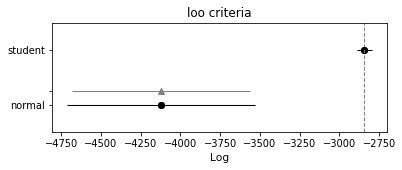

In [23]:
az.plot_compare(comp_df)
plt.title("loo criteria")

In [10]:
comp_df2 = az.compare(comp_dict, ic='waic')
comp_df2

,rank,waic,p_waic,d_waic,weight,se,dse,warning,waic_scale
student,0,-2842.171647,3.161114e-28,0.000000,0.389495,45.261602,0.000000,False,log
normal,1,-4121.842402,2.813551e-26,1279.670755,0.610505,590.336207,559.145899,False,log


Text(0.5, 1.0, 'waic criteria')

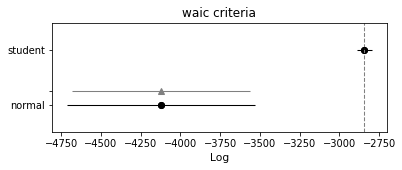

In [11]:
az.plot_compare(comp_df2)
plt.title("waic criteria")

After comparing results we can see that from both waic and loo criteria it seems that student model fits the data better as it has lower abs value.



## Excercise 3

In [12]:
def extract_X_y(df, row_idx, K):
    matrix_size = N * K
    full_matrix_size = N * 3
    matrix_values = df.iloc[row_idx, 2:matrix_size+2].values
    matrix = matrix_values.reshape((N, K))
    arr = df.iloc[row_idx, full_matrix_size+5:].values
    return matrix, arr

In [13]:
def compile_and_draw(row_idx, num_of_predictors):
    model = CmdStanModel(stan_file='code_5.stan')

    R = 1000
    X, y = extract_X_y(df2, row_idx, num_of_predictors)
    data_sim = {'N': N,
                'K': num_of_predictors,
                'y': y,
                'X': X}
    sim=model.sample(data=data_sim,
                        iter_sampling=R,
                        iter_warmup=0,
                        chains=1,
                        fixed_param=True,
                        seed=21,refresh=R)

    return sim.draws_pd(), az.from_cmdstanpy(sim)

In [14]:
df5_1, inf5_1 = compile_and_draw(0, 1)
df5_2, inf5_2 = compile_and_draw(0, 2)
df5_3, inf5_3 = compile_and_draw(0, 3)

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing
chain 1 |██████████| 00:06 Sampling completed                      


INFO:cmdstanpy:CmdStan done processing.


INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing
chain 1 |██████████| 00:07 Sampling completed                      


INFO:cmdstanpy:CmdStan done processing.


INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing
chain 1 |██████████| 00:07 Sampling completed                      


INFO:cmdstanpy:CmdStan done processing.


In [15]:
comp_dict3 = {"1 predictor": inf5_1, "2 predictors": inf5_2, "3 predictors": inf5_3}
comp_df3 = az.compare(comp_dict3, ic='loo')
comp_df3

/usr/local/lib/python3.9/site-packages/arviz/stats/stats.py:811: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.7 for one or more samples. You should consider using a more robust model, this is because importance sampling is less likely to work well if the marginal posterior and LOO posterior are very different. This is more likely to happen with a non-robust model and highly influential observations.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/arviz/stats/stats.py:811: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.7 for one or more samples. You should consider using a more robust model, this is because importance sampling is less likely to work well if the marginal posterior and LOO posterior are very different. This is more likely to happen with a non-robust model and highly influential observations.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/arviz/stats/stats.py:811: UserWarning: Estimated sh

,rank,loo,p_loo,d_loo,weight,se,dse,warning,loo_scale
1 predictor,0,-8044.449755,0.0,0.000000,0.570782,206.279721,0.000000,True,log
2 predictors,1,-11900.188860,0.0,3855.739105,0.218936,325.785580,230.903050,True,log
3 predictors,2,-15973.530639,0.0,7929.080884,0.210282,467.802052,413.176608,True,log


Text(0.5, 1.0, 'loo criteria')

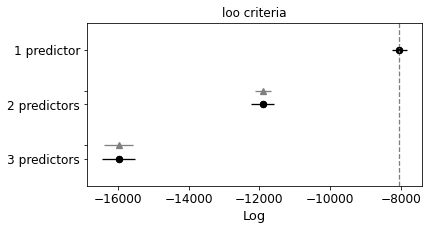

In [16]:
az.plot_compare(comp_df3)
plt.title("loo criteria")

In [17]:
comp_dict3 = {"1 predictor": inf5_1, "2 predictors": inf5_2, "3 predictors": inf5_3}
comp_df3 = az.compare(comp_dict3, ic='waic')
comp_df3

,rank,waic,p_waic,d_waic,weight,se,dse,warning,waic_scale
1 predictor,0,-8044.449755,4.233545e-27,0.000000,0.570782,206.279721,0.000000,False,log
2 predictors,1,-11900.188860,9.590490e-27,3855.739105,0.218936,325.785580,230.903050,False,log
3 predictors,2,-15973.530639,1.957043e-26,7929.080884,0.210282,467.802052,413.176608,False,log


Text(0.5, 1.0, 'waic criteria')

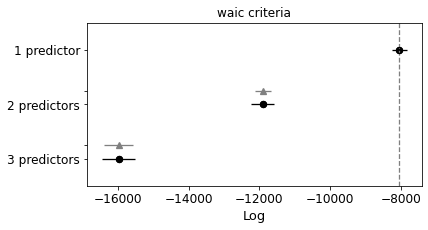

In [18]:
az.plot_compare(comp_df3)
plt.title("waic criteria")